# Load the Data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('datasets/train.csv')
features = pd.read_csv('datasets/features.csv')
stores = pd.read_csv('datasets/stores.csv')
test = pd.read_csv('datasets/test.csv')

# Convert Date Columns to datetime

In [4]:
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])


# Merge the Datasets (Feature , Store with Train)


In [5]:
feature_store = pd.merge(features, stores, on='Store', how='left')


In [6]:
train_merged = pd.merge(train, feature_store, on=['Store', 'Date', 'IsHoliday'], how='left')


In [7]:
train_merged = train_merged.sort_values(['Store', 'Dept', 'Date']).reset_index(drop=True)
train_merged

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


# Handle Missing Values and Confirming

In [8]:
train_merged = train_merged.copy()

Number of outliers: 3005
Percentage of outliers: 0.72%


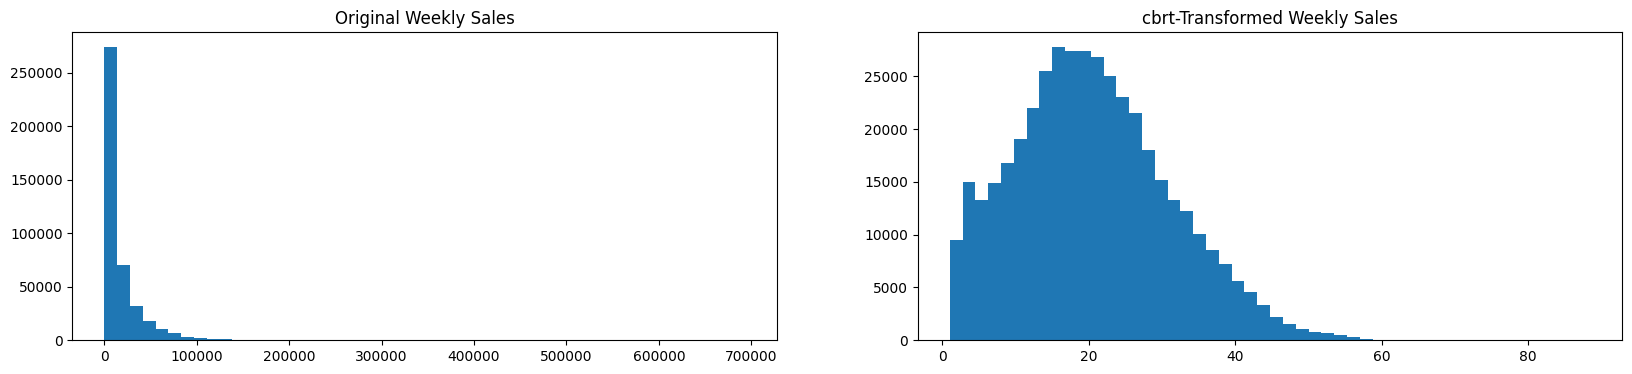

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Add a small constant to avoid log(0)
train_merged = train_merged[train_merged["Weekly_Sales"] > 0]
train_merged['Weekly_Sales_cbrt'] = np.cbrt(train_merged['Weekly_Sales'] + 1)

# Compare distributions
plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
plt.hist(train_merged['Weekly_Sales'], bins=50)
plt.title("Original Weekly Sales")

plt.subplot(1, 2, 2)
plt.hist(train_merged['Weekly_Sales_cbrt'], bins=50)
plt.title("cbrt-Transformed Weekly Sales")

# Calculate Q1, Q3 and IQR
Q1 = train_merged["Weekly_Sales_cbrt"].quantile(0.25)
Q3 = train_merged["Weekly_Sales_cbrt"].quantile(0.75)
IQR = Q3 - Q1

# Define limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Detect outliers
outliers_cbrt = train_merged[
    (train_merged["Weekly_Sales_cbrt"] < lower_limit) |
    (train_merged["Weekly_Sales_cbrt"] > upper_limit)
]

# Number of outliers
num_outliers = len(outliers_cbrt)
print("Number of outliers:", num_outliers)

# Percentage of outliers
percent_outliers = num_outliers / len(train_merged) * 100
print(f"Percentage of outliers: {percent_outliers:.2f}%")

plt.show()


In [10]:
train_merged.drop_duplicates(inplace=True)

In [11]:
Markdown = [ "MarkDown1" , "MarkDown2" , "MarkDown3" , "MarkDown4" , "MarkDown5"]

for column in Markdown:
    train_merged[f"{column}_is_missing"] = train_merged[column].isnull().astype(int)
    train_merged.fillna(0 , inplace=True)

train_merged.head()    

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales_cbrt,MarkDown1_is_missing,MarkDown2_is_missing,MarkDown3_is_missing,MarkDown4_is_missing,MarkDown5_is_missing
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,29.211103,1,0,0,0,0
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,35.840988,1,0,0,0,0
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,34.648606,1,0,0,0,0
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,26.872070,1,0,0,0,0
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,27.947563,1,0,0,0,0


In [12]:
train_merged.isnull().sum()

Store                   0
Dept                    0
Date                    0
Weekly_Sales            0
IsHoliday               0
Temperature             0
Fuel_Price              0
MarkDown1               0
MarkDown2               0
MarkDown3               0
MarkDown4               0
MarkDown5               0
CPI                     0
Unemployment            0
Type                    0
Size                    0
Weekly_Sales_cbrt       0
MarkDown1_is_missing    0
MarkDown2_is_missing    0
MarkDown3_is_missing    0
MarkDown4_is_missing    0
MarkDown5_is_missing    0
dtype: int64

In [13]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420212 entries, 0 to 421569
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Store                 420212 non-null  int64         
 1   Dept                  420212 non-null  int64         
 2   Date                  420212 non-null  datetime64[ns]
 3   Weekly_Sales          420212 non-null  float64       
 4   IsHoliday             420212 non-null  bool          
 5   Temperature           420212 non-null  float64       
 6   Fuel_Price            420212 non-null  float64       
 7   MarkDown1             420212 non-null  float64       
 8   MarkDown2             420212 non-null  float64       
 9   MarkDown3             420212 non-null  float64       
 10  MarkDown4             420212 non-null  float64       
 11  MarkDown5             420212 non-null  float64       
 12  CPI                   420212 non-null  float64       
 13  Unem

In [14]:
train_merged.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Weekly_Sales_cbrt,MarkDown1_is_missing,MarkDown2_is_missing,MarkDown3_is_missing,MarkDown4_is_missing,MarkDown5_is_missing
count,420212.000000,420212.000000,420212,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.0,420212.0,420212.0,420212.0
mean,22.195611,44.241309,2011-06-18 07:35:12.682169600,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787,20.511952,0.642607,0.0,0.0,0.0,0.0
min,1.000000,1.000000,2010-02-05 00:00:00,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,1.003322,0.000000,0.0,0.0,0.0,0.0
25%,11.000000,18.000000,2010-10-08 00:00:00,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,12.848599,0.000000,0.0,0.0,0.0,0.0
50%,22.000000,37.000000,2011-06-17 00:00:00,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000,19.714871,1.000000,0.0,0.0,0.0,0.0
75%,33.000000,74.000000,2012-02-24 00:00:00,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000,27.266795,1.000000,0.0,0.0,0.0,0.0
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,88.497712,1.000000,0.0,0.0,0.0,0.0
std,12.787236,30.508819,NaN,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568,10.582299,0.479233,0.0,0.0,0.0,0.0


In [15]:
print(train_merged.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Weekly_Sales_cbrt',
       'MarkDown1_is_missing', 'MarkDown2_is_missing', 'MarkDown3_is_missing',
       'MarkDown4_is_missing', 'MarkDown5_is_missing'],
      dtype='object')


In [16]:
test['Date'] = pd.to_datetime(test['Date'])
features['Date'] = pd.to_datetime(features['Date'])

In [17]:
feature_store = pd.merge(features, stores, on='Store', how='left')


In [18]:
test_merged = pd.merge(test, feature_store, on=['Store', 'Date', 'IsHoliday'], how='left')


In [19]:
test_merged = test_merged.sort_values(['Store', 'Dept', 'Date']).reset_index(drop=True)


In [20]:
test_merged.fillna(0, inplace=True)


In [21]:
print(test_merged.info())
print(test_merged.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  bool          
 4   Temperature   115064 non-null  float64       
 5   Fuel_Price    115064 non-null  float64       
 6   MarkDown1     115064 non-null  float64       
 7   MarkDown2     115064 non-null  float64       
 8   MarkDown3     115064 non-null  float64       
 9   MarkDown4     115064 non-null  float64       
 10  MarkDown5     115064 non-null  float64       
 11  CPI           115064 non-null  float64       
 12  Unemployment  115064 non-null  float64       
 13  Type          115064 non-null  object        
 14  Size          115064 non-null  int64         
dtypes: bool(1), datet

In [22]:
print(test_merged.columns)

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size'],
      dtype='object')


In [23]:
test_merged

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,0.000000,0.000,B,118221
115060,45,98,2013-07-05,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,0.000000,0.000,B,118221
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,0.000000,0.000,B,118221
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,0.000000,0.000,B,118221


In [24]:
train_merged[train_merged['Store'] == 45 ]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales_cbrt,MarkDown1_is_missing,MarkDown2_is_missing,MarkDown3_is_missing,MarkDown4_is_missing,MarkDown5_is_missing
411933,45,1,2010-02-05,18628.11,False,27.31,2.784,0.00,0.00,0.00,0.00,0.00,181.871190,8.992,B,118221,26.509246,1,0,0,0,0
411934,45,1,2010-02-12,22416.94,True,27.73,2.773,0.00,0.00,0.00,0.00,0.00,181.982317,8.992,B,118221,28.196718,1,0,0,0,0
411935,45,1,2010-02-19,28756.53,False,31.27,2.745,0.00,0.00,0.00,0.00,0.00,182.034782,8.992,B,118221,30.637303,1,0,0,0,0
411936,45,1,2010-02-26,14656.08,False,34.89,2.754,0.00,0.00,0.00,0.00,0.00,182.077469,8.992,B,118221,24.472734,1,0,0,0,0
411937,45,1,2010-03-05,16608.87,False,37.13,2.777,0.00,0.00,0.00,0.00,0.00,182.120157,8.992,B,118221,25.514599,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,7.986279,0,0,0,0,0
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221,8.568535,0,0,0,0,0
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221,10.202601,0,0,0,0,0
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221,9.129846,0,0,0,0,0


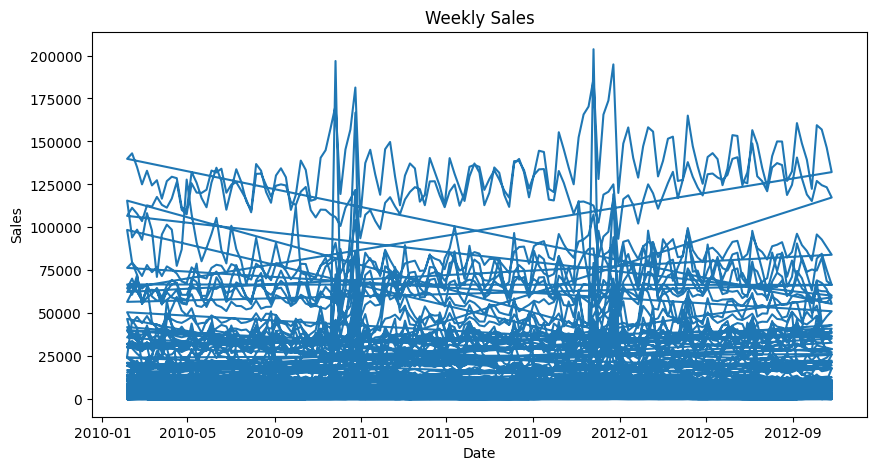

In [25]:
store1 = train_merged[train_merged['Store'] == 1]
plt.figure(figsize=(10,5))
plt.plot(store1['Date'],store1['Weekly_Sales'])
plt.title('Weekly Sales')
plt.xlabel('Date')
plt.ylabel("Sales")
plt.show()

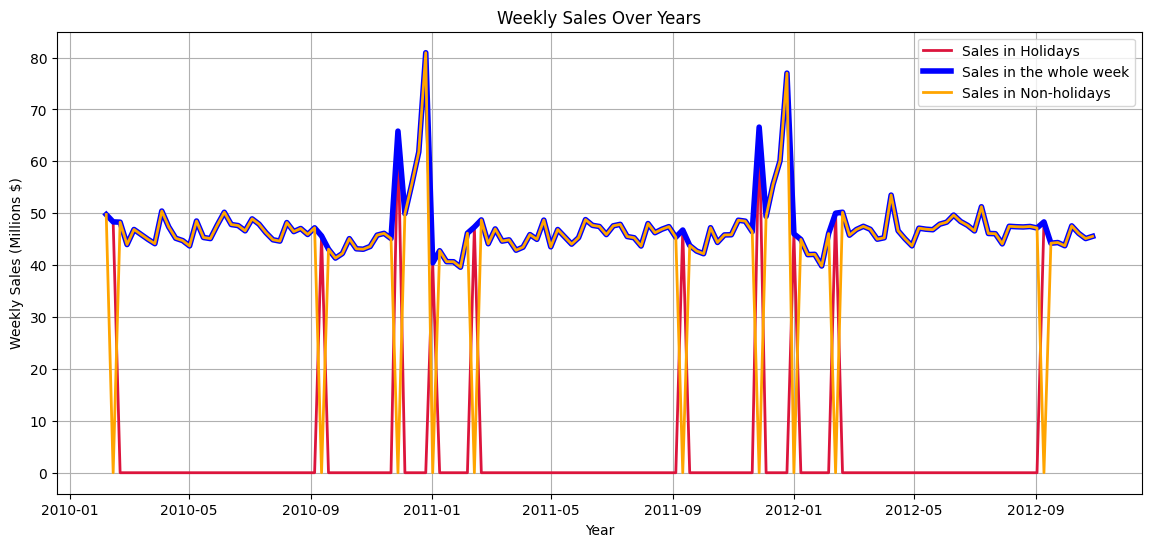

In [26]:
train_merged['Date'] = pd.to_datetime(train_merged['Date'])
train_merged = train_merged.set_index('Date')

weekly_sales = train_merged['Weekly_Sales'].resample('W').sum()
holiday_sales = train_merged[train_merged['IsHoliday'] == True]['Weekly_Sales'].resample('W').sum()
non_holiday_sales = train_merged[train_merged['IsHoliday'] == False]['Weekly_Sales'].resample('W').sum()

plt.figure(figsize=(14,6))

plt.plot(holiday_sales.index , holiday_sales.values / 1e6 , color='crimson' , linewidth=2)
plt.plot(weekly_sales.index, weekly_sales.values / 1e6, color='blue', linewidth=4) 
plt.plot(non_holiday_sales.index , non_holiday_sales.values / 1e6 , color="orange" , linewidth=2) 

plt.title('Weekly Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Weekly Sales (Millions $)')
plt.grid(True)
plt.legend(["Sales in Holidays ","Sales in the whole week","Sales in Non-holidays"])
plt.show()


In [27]:
# sales = train_merged["Weekly_Sales"]
# result = adfuller(sales ,  maxlag=20 , autolag=None)

# print('ADF Statistic:'% result[0])
# print("P-value: " % result[1] )

In [28]:
print(train_merged.dtypes)

Store                     int64
Dept                      int64
Weekly_Sales            float64
IsHoliday                  bool
Temperature             float64
Fuel_Price              float64
MarkDown1               float64
MarkDown2               float64
MarkDown3               float64
MarkDown4               float64
MarkDown5               float64
CPI                     float64
Unemployment            float64
Type                     object
Size                      int64
Weekly_Sales_cbrt       float64
MarkDown1_is_missing      int64
MarkDown2_is_missing      int64
MarkDown3_is_missing      int64
MarkDown4_is_missing      int64
MarkDown5_is_missing      int64
dtype: object


# correlation ratio num-cat
# cramer's v cat-cat

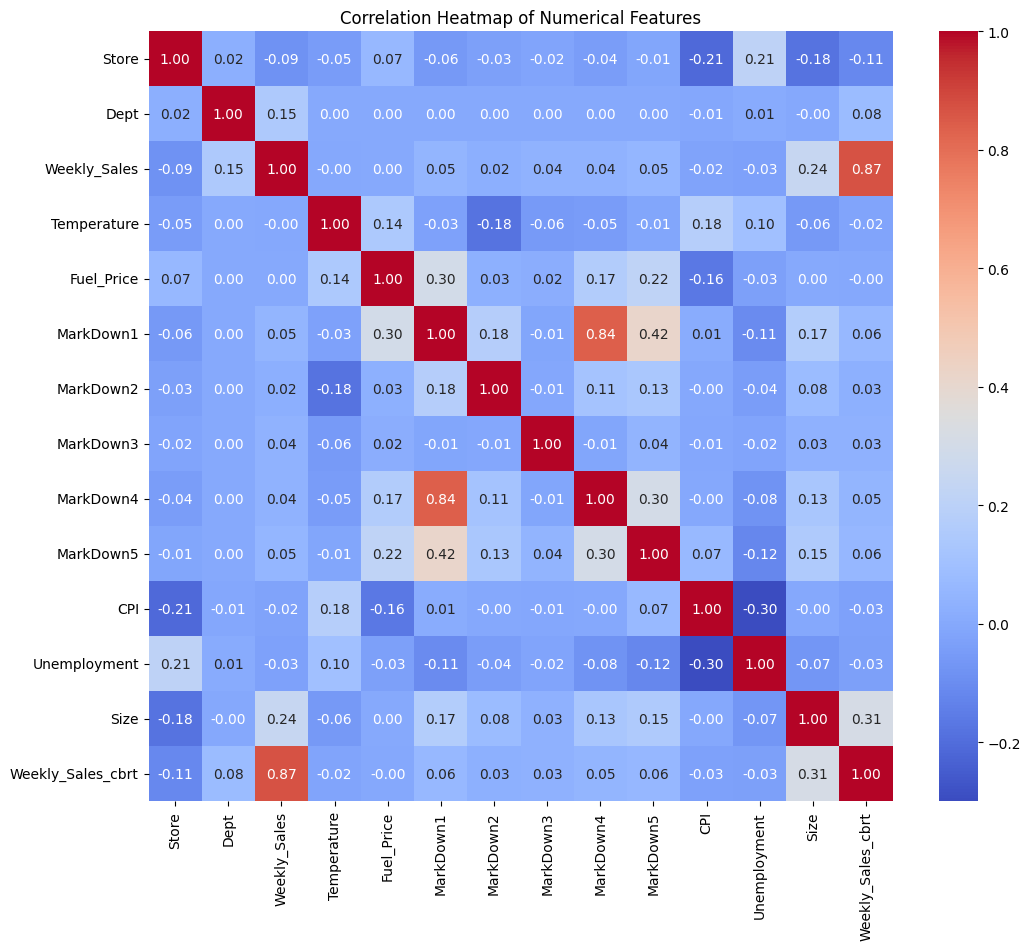

In [29]:
numerical_data = train_merged.select_dtypes(["int64" , "float64"])
numerical_data = numerical_data.drop(columns=[ "MarkDown1_is_missing" , "MarkDown2_is_missing" , "MarkDown3_is_missing" , "MarkDown4_is_missing" , "MarkDown5_is_missing"])
correlation_matrixx = numerical_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrixx, annot=True, fmt= ".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_12208\2511365945.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_sales_grouped = train_merged.groupby("temp_sales")["Weekly_Sales"].mean()


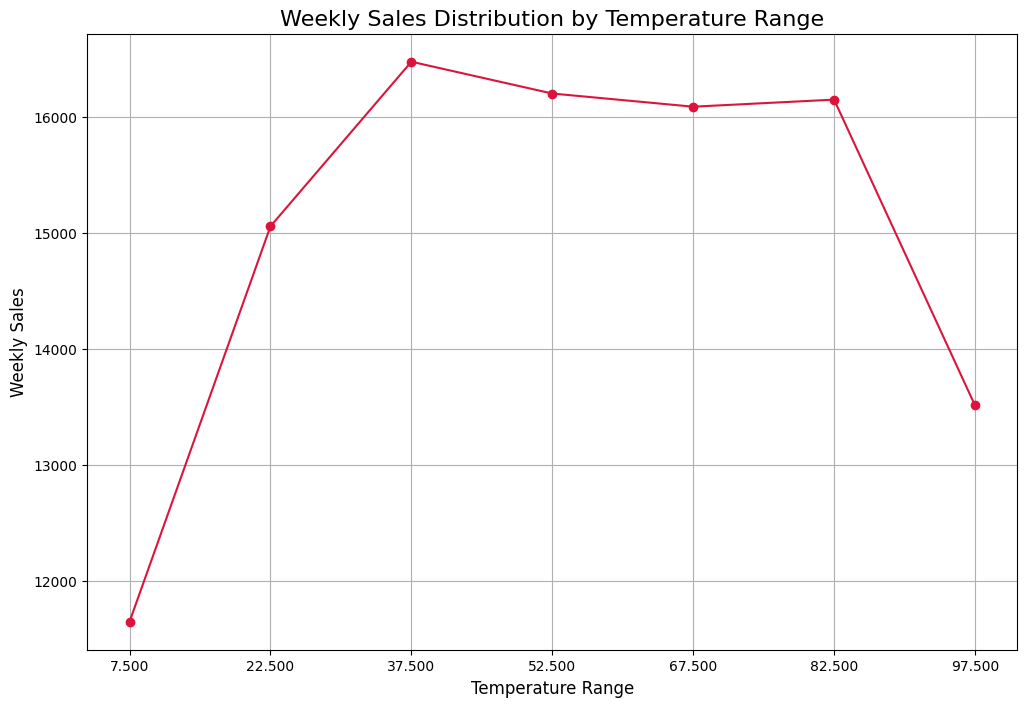

In [45]:
temp_sales_bins = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150]
midpointss = [(temp_sales_bins[i] + temp_sales_bins[i+1])/2
               for i in range(len(temp_sales_bins) - 1)]
temp_sales_labels = [f'{m:.3f}' for m in midpointss]

train_merged['temp_sales'] = pd.cut(train_merged['Temperature'],   bins=temp_sales_bins,  labels=temp_sales_labels, include_lowest=True)

temp_sales_grouped = train_merged.groupby("temp_sales")["Weekly_Sales"].mean()

plt.figure(figsize=(12, 8))
plt.plot(temp_sales_grouped.index, temp_sales_grouped.values , marker='o',linestyle='-' , color='crimson')
plt.title('Weekly Sales Distribution by Temperature Range', fontsize=16)
plt.xlabel('Temperature Range', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.grid()
plt.show()

In [31]:
train_merged['Fuel_Price'].max() #4.468
train_merged['Fuel_Price'].min() #2.472


np.float64(2.472)

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_12208\1048480660.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuel_sales_grouped = train_merged.groupby("Fuel_Price_Group")["Weekly_Sales"].mean()


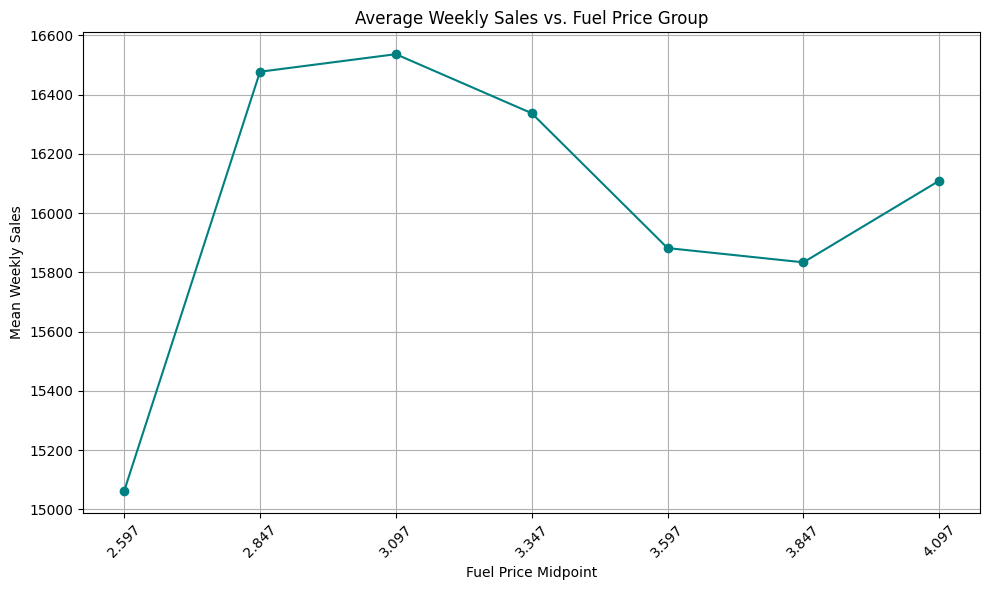

In [41]:
fuel_sales_bins = [2.472 , 2.722 , 2.972 , 3.222, 3.472, 3.722, 3.972, 4.222]

midpoints = [(fuel_sales_bins[i] + fuel_sales_bins[i+1]) / 2
            for i in range(len(fuel_sales_bins) - 1)]

fuel_sales_labels = [f'{m:.3f}' for m in midpoints]

train_merged['Fuel_Price_Group'] = pd.cut(train_merged['Fuel_Price'],   bins=fuel_sales_bins,  labels=fuel_sales_labels, include_lowest=True)

fuel_sales_grouped = train_merged.groupby("Fuel_Price_Group")["Weekly_Sales"].mean()


plt.figure(figsize=(10,6))
plt.plot(fuel_sales_grouped.index, fuel_sales_grouped.values, marker='o',linestyle='-',color='teal')
plt.xlabel('Fuel Price Midpoint')
plt.ylabel('Mean Weekly Sales')
plt.title('Average Weekly Sales vs. Fuel Price Group')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

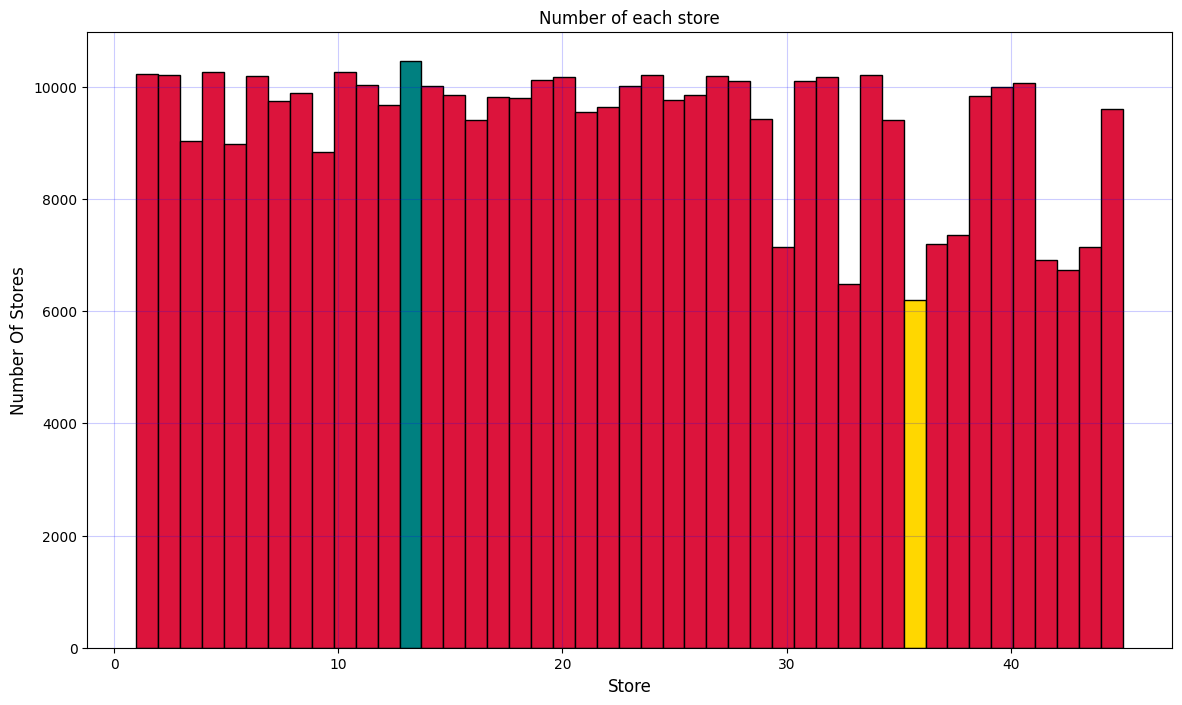

In [34]:
plt.figure(figsize=(14,8))
n , bins , patches = plt.hist(train_merged["Store"] , bins=45 , edgecolor='black',color='crimson')
max_index = np.argmax(n)
min_index = np.argmin(n)
patches[max_index].set_facecolor('teal')
patches[min_index].set_facecolor('gold')
plt.grid(True , color='blue' , alpha=0.2)
plt.xlabel("Store" , fontsize=12)
plt.ylabel("Number Of Stores", fontsize=12)
title_objj = plt.title("Number of each store", fontsize=12)

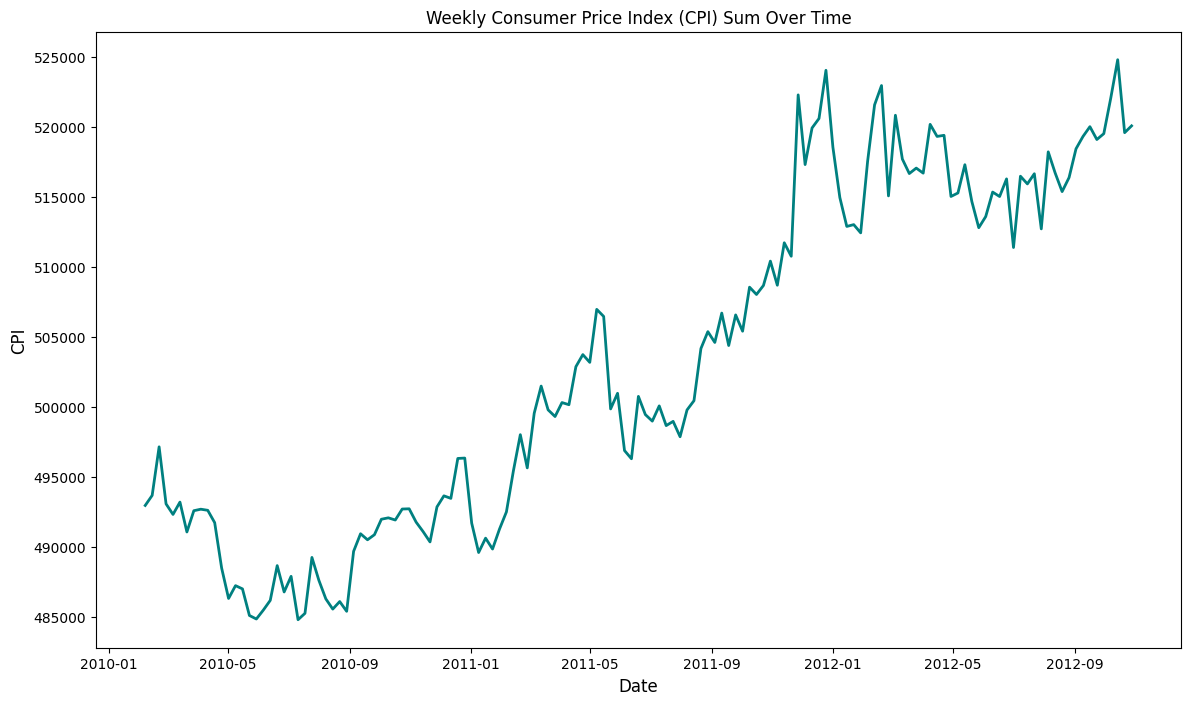

In [35]:
cpi = train_merged["CPI"].resample('W').sum()
plt.figure(figsize=(14,8))
plt.plot(cpi.index , cpi.values , color='teal', linewidth=2)
plt.xlabel("Date", fontsize=12)
plt.ylabel("CPI", fontsize=12)
title_obj = plt.title("Weekly Consumer Price Index (CPI) Sum Over Time" , fontsize=12)

In [36]:
# train_merged.to_csv('om_el_data.csv')
x =pd.read_csv("om_el_data.csv")